# 1. **Change the number of observations to 100,000 and see what happens.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

training_data = np.load('TF_intro.npz')

input_size = 2

output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 414.4343
Epoch 2/100
32/32 - 0s - loss: 399.3212
Epoch 3/100
32/32 - 0s - loss: 384.6346
Epoch 4/100
32/32 - 0s - loss: 370.7977
Epoch 5/100
32/32 - 0s - loss: 356.8932
Epoch 6/100
32/32 - 0s - loss: 344.1116
Epoch 7/100
32/32 - 0s - loss: 331.5591
Epoch 8/100
32/32 - 0s - loss: 319.6371
Epoch 9/100
32/32 - 0s - loss: 308.3051
Epoch 10/100
32/32 - 0s - loss: 297.4112
Epoch 11/100
32/32 - 0s - loss: 286.9104
Epoch 12/100
32/32 - 0s - loss: 276.7552
Epoch 13/100
32/32 - 0s - loss: 267.0018
Epoch 14/100
32/32 - 0s - loss: 257.5414
Epoch 15/100
32/32 - 0s - loss: 248.6078
Epoch 16/100
32/32 - 0s - loss: 239.9471
Epoch 17/100
32/32 - 0s - loss: 231.5690
Epoch 18/100
32/32 - 0s - loss: 223.5538
Epoch 19/100
32/32 - 0s - loss: 215.8376
Epoch 20/100
32/32 - 0s - loss: 208.4648
Epoch 21/100
32/32 - 0s - loss: 201.2818
Epoch 22/100
32/32 - 0s - loss: 194.4943
Epoch 23/100
32/32 - 0s - loss: 187.9919
Epoch 24/100
32/32 - 0s - loss: 181.6526
Epoch 25/100
32/32 - 0s -

In [3]:
model.layers[0].get_weights()

[array([[ 1.7045307],
        [-2.5699115]], dtype=float32), array([0.29686606], dtype=float32)]

In [4]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.7045307],
       [-2.5699115]], dtype=float32)

In [5]:
bias = model.layers[0].get_weights()[1]
bias

array([0.29686606], dtype=float32)

In [6]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  1.6],
       [-16. ],
       [ 19. ],
       [ 19.4],
       [ -0.7],
       [ -4.3],
       [ 23.7],
       [-10.5],
       [ 21.9],
       [ 29.3],
       [ 27.4],
       [ 13.6],
       [  8.4],
       [  1.9],
       [-13.8],
       [  9.3],
       [-13.1],
       [ 10. ],
       [ 10.7],
       [  2.8],
       [ -6.3],
       [ 10.4],
       [ 11.9],
       [-12.4],
       [ 27.2],
       [  1.6],
       [  7.9],
       [ 18.7],
       [-13.5],
       [-12.3],
       [  8.7],
       [ 12.2],
       [  0.3],
       [ 25.9],
       [ -6. ],
       [-16.2],
       [-15.4],
       [ 32.8],
       [ 15. ],
       [ -0.4],
       [ -2.9],
       [-13.9],
       [-35.4],
       [ 12.5],
       [  7. ],
       [  3.2],
       [ -0.7],
       [-30.4],
       [ 21.9],
       [-15. ],
       [-19.8],
       [-10.7],
       [ 23.5],
       [ 16.7],
       [ 16.9],
       [ -9.5],
       [-13.3],
       [ 10.4],
       [ -7.3],
       [ -6. ],
       [ 28.9],
       [  5.7],
       [

In [7]:
training_data['targets'].round(1)

array([[  5.9],
       [-14.5],
       [ 26.9],
       [ 28. ],
       [  3.8],
       [ -0.7],
       [ 33.3],
       [ -6.6],
       [ 29.5],
       [ 38.1],
       [ 36.6],
       [ 21.5],
       [ 14.5],
       [  7.7],
       [-12.1],
       [ 15.4],
       [-10.3],
       [ 16.8],
       [ 16.3],
       [  8.5],
       [ -3.4],
       [ 17.3],
       [ 18.7],
       [ -9.7],
       [ 36.8],
       [  6.1],
       [ 13.6],
       [ 26.8],
       [-12. ],
       [ -9.4],
       [ 14.8],
       [ 18.6],
       [  5.5],
       [ 35.4],
       [ -1.8],
       [-15. ],
       [-12.9],
       [ 42.3],
       [ 21.4],
       [  4.4],
       [  0.5],
       [-11. ],
       [-36. ],
       [ 18.8],
       [ 13. ],
       [  7.4],
       [  3.5],
       [-31.2],
       [ 30.5],
       [-12.4],
       [-17.6],
       [ -8.5],
       [ 32.1],
       [ 24.8],
       [ 23.8],
       [ -6. ],
       [-10.8],
       [ 16.8],
       [ -4.4],
       [ -1.6],
       [ 38.1],
       [ 10.5],
       [

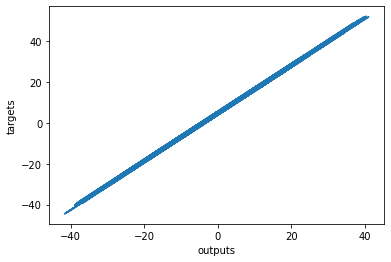

In [8]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# **Conclusion:**

1. It takes the algorithm the same time to finish working.
2. The loss is not really minimized.
3. The weights and biases have not reached the desired values.
4. More iterations are needed for this learning rate to solve the problem.
5. The problem is not solved.
6. The final graph looks like a 45-degree line, but if you scale the axes, it would not be a 45-degree line.

# 2. **Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe.**

In [9]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

training_data = np.load('TF_intro.npz')

input_size = 2

output_size = 1

model = tf.keras.Sequential([
                            
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=1)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: nan
Epoch 2/100
32/32 - 0s - loss: nan
Epoch 3/100
32/32 - 0s - loss: nan
Epoch 4/100
32/32 - 0s - loss: nan
Epoch 5/100
32/32 - 0s - loss: nan
Epoch 6/100
32/32 - 0s - loss: nan
Epoch 7/100
32/32 - 0s - loss: nan
Epoch 8/100
32/32 - 0s - loss: nan
Epoch 9/100
32/32 - 0s - loss: nan
Epoch 10/100
32/32 - 0s - loss: nan
Epoch 11/100
32/32 - 0s - loss: nan
Epoch 12/100
32/32 - 0s - loss: nan
Epoch 13/100
32/32 - 0s - loss: nan
Epoch 14/100
32/32 - 0s - loss: nan
Epoch 15/100
32/32 - 0s - loss: nan
Epoch 16/100
32/32 - 0s - loss: nan
Epoch 17/100
32/32 - 0s - loss: nan
Epoch 18/100
32/32 - 0s - loss: nan
Epoch 19/100
32/32 - 0s - loss: nan
Epoch 20/100
32/32 - 0s - loss: nan
Epoch 21/100
32/32 - 0s - loss: nan
Epoch 22/100
32/32 - 0s - loss: nan
Epoch 23/100
32/32 - 0s - loss: nan
Epoch 24/100
32/32 - 0s - loss: nan
Epoch 25/100
32/32 - 0s - loss: nan
Epoch 26/100
32/32 - 0s - loss: nan
Epoch 27/100
32/32 - 0s - loss: nan
Epoch 28/100
32/32 - 0s - loss: nan
E

In [10]:
model.layers[0].get_weights()

[array([[nan],
        [nan]], dtype=float32), array([nan], dtype=float32)]

In [11]:
weights = model.layers[0].get_weights()[0]
weights

array([[nan],
       [nan]], dtype=float32)

In [12]:
bias = model.layers[0].get_weights()[1]
bias

array([nan], dtype=float32)

In [13]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [14]:
training_data['targets'].round(1)

array([[-11.3],
       [ 14.2],
       [ -0.9],
       [ 24.3],
       [-17.4],
       [ 18.1],
       [-13.6],
       [ 18.4],
       [-16.3],
       [-19.2],
       [ -3. ],
       [ 45.9],
       [ 26.5],
       [-14.7],
       [ -5.1],
       [ -7.1],
       [-10.9],
       [  9.3],
       [ 19.6],
       [-13.8],
       [  5.6],
       [ -6.9],
       [  8.9],
       [-38.5],
       [ 19.3],
       [  9.6],
       [ 26.4],
       [-39.6],
       [ -8.9],
       [ 22.3],
       [-14.8],
       [ 21. ],
       [  5.6],
       [ 39.1],
       [-23.7],
       [ 25.1],
       [  6.8],
       [ -9.6],
       [-20.2],
       [  4.3],
       [  0.7],
       [  0.2],
       [ 31.9],
       [ 30.1],
       [-12.1],
       [-33.1],
       [ 40.1],
       [ -0.2],
       [-11.9],
       [ 26.8],
       [  6.3],
       [  2.5],
       [ 42.8],
       [ 10.4],
       [  2.8],
       [  6.6],
       [ -9.8],
       [ 18.9],
       [ 14. ],
       [ 15.4],
       [ 15.7],
       [ 28.6],
       [

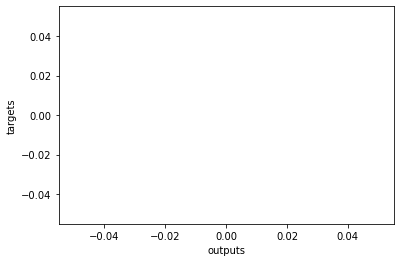

In [15]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# **Conclusion:**

1. It takes the algorithm the same time to finish working.
2. The loss diverges to infinity.
3. The weights and biases are completely random and extremely big (in fact their value is nan).
4. More iterations would not solve the issue, as the loss is not converging.
5. The problem is not solved.
6. The final graph cannot be printed as all outputs are nan.

# 3. **Change the loss function. An alternative loss for regressions is the Huber loss.**

In [16]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

training_data = np.load('TF_intro.npz')

input_size = 2

output_size = 1

model = tf.keras.Sequential([
                            
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 24.0696
Epoch 2/100
32/32 - 0s - loss: 1.2580
Epoch 3/100
32/32 - 0s - loss: 0.4221
Epoch 4/100
32/32 - 0s - loss: 0.3923
Epoch 5/100
32/32 - 0s - loss: 0.4041
Epoch 6/100
32/32 - 0s - loss: 0.4176
Epoch 7/100
32/32 - 0s - loss: 0.3926
Epoch 8/100
32/32 - 0s - loss: 0.4027
Epoch 9/100
32/32 - 0s - loss: 0.4124
Epoch 10/100
32/32 - 0s - loss: 0.3782
Epoch 11/100
32/32 - 0s - loss: 0.3742
Epoch 12/100
32/32 - 0s - loss: 0.4414
Epoch 13/100
32/32 - 0s - loss: 0.3718
Epoch 14/100
32/32 - 0s - loss: 0.3988
Epoch 15/100
32/32 - 0s - loss: 0.3582
Epoch 16/100
32/32 - 0s - loss: 0.3854
Epoch 17/100
32/32 - 0s - loss: 0.4178
Epoch 18/100
32/32 - 0s - loss: 0.3878
Epoch 19/100
32/32 - 0s - loss: 0.3729
Epoch 20/100
32/32 - 0s - loss: 0.3961
Epoch 21/100
32/32 - 0s - loss: 0.3696
Epoch 22/100
32/32 - 0s - loss: 0.3956
Epoch 23/100
32/32 - 0s - loss: 0.4066
Epoch 24/100
32/32 - 0s - loss: 0.4151
Epoch 25/100
32/32 - 0s - loss: 0.3828
Epoch 26/100
32/32 - 0s - loss: 0

In [17]:
model.layers[0].get_weights()

[array([[ 2.0741563],
        [-3.0040267]], dtype=float32), array([5.0355735], dtype=float32)]

In [18]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0741563],
       [-3.0040267]], dtype=float32)

In [19]:
bias = model.layers[0].get_weights()[1]

In [20]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-18.1],
       [  9.6],
       [ -4. ],
       [-29.4],
       [ 23.5],
       [-16.7],
       [-12.3],
       [ 10.1],
       [ 38.7],
       [  3.1],
       [ 40. ],
       [ 45.1],
       [  3.5],
       [ 21.3],
       [ -5.2],
       [  0.3],
       [ 27.2],
       [ 16.8],
       [ 24.9],
       [ 19.6],
       [ 15.9],
       [-13.6],
       [ -5.8],
       [ 43.9],
       [ 11.6],
       [  6.2],
       [  8.7],
       [-19.1],
       [ 12.2],
       [ 14.1],
       [ -3. ],
       [ -2.5],
       [-42.5],
       [ 28.2],
       [  4.2],
       [ 21.8],
       [-12.6],
       [ 18.2],
       [  9.4],
       [  6.6],
       [  5.9],
       [-33.2],
       [ -3.6],
       [-15. ],
       [ 16.7],
       [ 17.6],
       [-25.8],
       [ -9.9],
       [-22.4],
       [ 11.6],
       [  7.9],
       [  9.6],
       [ -0.8],
       [  1.2],
       [ 27.8],
       [ -6.5],
       [  0.7],
       [ -6.5],
       [ -0.4],
       [ 33.2],
       [ 18. ],
       [ 40.6],
       [

In [21]:
training_data['targets'].round(1)

array([[-18.3],
       [ 10.3],
       [ -3.8],
       [-29.8],
       [ 24. ],
       [-17.6],
       [-10.9],
       [ 10.7],
       [ 39.1],
       [  2.6],
       [ 38.7],
       [ 43.7],
       [  3.1],
       [ 20.8],
       [ -4.4],
       [  1.6],
       [ 26.3],
       [ 17. ],
       [ 24. ],
       [ 18.9],
       [ 15.3],
       [-13.2],
       [ -5. ],
       [ 43.3],
       [ 10.6],
       [  5.1],
       [  9.2],
       [-18.8],
       [ 13.1],
       [ 13.4],
       [ -1.5],
       [ -1.3],
       [-42.2],
       [ 29.1],
       [  4.6],
       [ 21. ],
       [-13. ],
       [ 18.1],
       [ 10. ],
       [  5.8],
       [  5.2],
       [-32.9],
       [ -3.9],
       [-14.7],
       [ 16.5],
       [ 18.3],
       [-25.7],
       [ -9.1],
       [-22.4],
       [ 11.7],
       [  8. ],
       [ 10.6],
       [  0.2],
       [  0.9],
       [ 27.6],
       [ -7. ],
       [  1.8],
       [ -5.7],
       [  1. ],
       [ 33.6],
       [ 17. ],
       [ 40.4],
       [

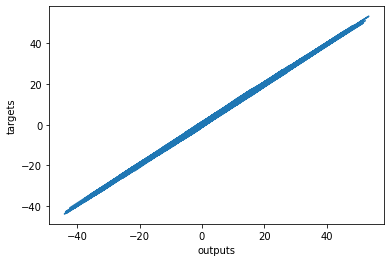

In [22]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()